# 使用Functional API建構新的神經網路

In [1]:
%env KERAS_BACKEND=tensorflow
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import interact, IntSlider, Button

from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import Adam

from keras.datasets import mnist
 
from keras.utils import np_utils
from keras.models import Model
from keras.layers import Input

from keras.layers import concatenate, add
from keras.layers.core import Lambda
from keras import backend as K

env: KERAS_BACKEND=tensorflow


Using TensorFlow backend.


In [2]:
# Input Training & Test Data
(x_train0, y_train0), (x_test0, y_test0) = mnist.load_data()
print("There are %d training data with size %d x %d" %x_train0.shape)
print("There are %d testing  data with size %d x %d" %x_test0.shape)

There are 60000 training data with size 28 x 28
There are 10000 testing  data with size 28 x 28


In [3]:
# Reshape Data
x_train = x_train0.reshape(60000, 784)
x_test = x_test0.reshape(10000, 784)

In [4]:
# Data Normalized
x_train -= x_train.min()
x_train = x_train/x_train.max()
 
x_test -= x_test.min()
x_test = x_test/x_test.max()

x_train.min(), x_train.max()
x_test.min(), x_test.max()

(0.0, 1.0)

In [5]:
y_train = np_utils.to_categorical(y_train0, 10)
y_test = np_utils.to_categorical(y_test0, 10)

# Function API 各階層設定

示意圖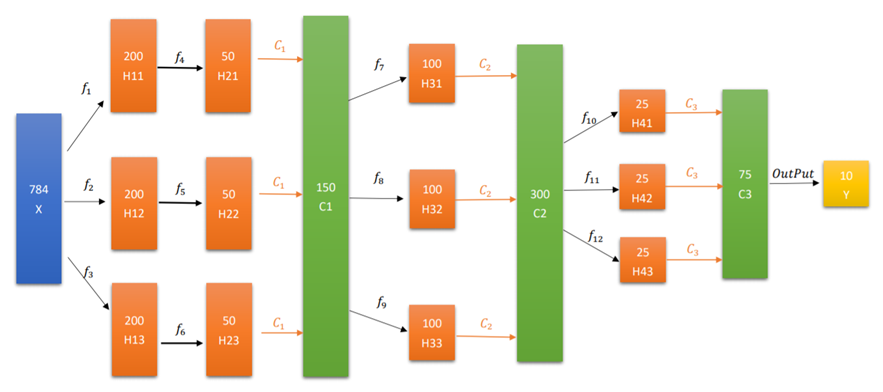

In [6]:
x = Input(shape=(784,))

# Function Definition
f_1 = Dense(200, activation = 'relu')
f_2 = Dense(200, activation = 'relu')
f_3 = Dense(200, activation = 'relu')

f_4 = Dense(50, activation = 'relu')
f_5 = Dense(50, activation = 'relu')
f_6 = Dense(50, activation = 'relu')

f_7 = Dense(100, activation='relu')
f_8 = Dense(100, activation='relu')
f_9 = Dense(100, activation='relu')

f_10 = Dense(25, activation='relu')
f_11 = Dense(25, activation='relu')
f_12 = Dense(25, activation='relu')

output = Dense(10, activation='softmax')

In [7]:
# Variables Definition
h_11 = f_1(x)
h_12 = f_2(x)
h_13 = f_3(x)

h_21 = f_4(h_11)
h_22 = f_5(h_12)
h_23 = f_6(h_13)

c_1 = concatenate([h_21,h_22,h_23])

h_31 = f_7(c_1)
h_32 = f_8(c_1)
h_33 = f_9(c_1)

c_2 = concatenate([h_31,h_32,h_33])

h_41 = f_10(c_2)
h_42 = f_11(c_2)
h_43 = f_12(c_2)

c_3 = concatenate([h_41,h_42,h_43])

y = output(c_3)

Instructions for updating:
Colocations handled automatically by placer.


In [8]:
model = Model(x,y)
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 784)          0                                            
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 200)          157000      input_1[0][0]                    
__________________________________________________________________________________________________
dense_2 (Dense)                 (None, 200)          157000      input_1[0][0]                    
__________________________________________________________________________________________________
dense_3 (Dense)                 (None, 200)          157000      input_1[0][0]                    
__________________________________________________________________________________________________
dense_4 (D

In [9]:
# Model Training
model.compile(loss = 'mse',optimizer=Adam(lr=0.001),metrics = ["accuracy"])
MODEL = model.fit(x_train, y_train, batch_size=500, epochs=40, verbose=1, validation_data=(x_test, y_test))

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/40
60000/60000 [==============================] - 4s 59us/step - loss: 0.0172 - acc: 0.8831 - val_loss: 0.0077 - val_acc: 0.9525
Epoch 2/40
60000/60000 [==============================] - 3s 47us/step - loss: 0.0060 - acc: 0.9614 - val_loss: 0.0052 - val_acc: 0.9670
Epoch 3/40
60000/60000 [==============================] - 3s 48us/step - loss: 0.0041 - acc: 0.9743 - val_loss: 0.0042 - val_acc: 0.9725
Epoch 4/40
60000/60000 [==============================] - 3s 47us/step - loss: 0.0032 - acc: 0.9800 - val_loss: 0.0039 - val_acc: 0.9747
Epoch 5/40
60000/60000 [==============================] - 3s 46us/step - loss: 0.0027 - acc: 0.9832 - val_loss: 0.0041 - val_acc: 0.9728
Epoch 6/40
60000/60000 [==============================] - 3s 46us/step - loss: 0.0020 - acc: 0.9880 - val_loss: 0.0033 - val_acc: 0.9791
Epoch 7/40
60000/60000 [==============================] - 3s 46us/step - loss: 0

In [10]:
score = model.evaluate(x_test, y_test)
print('loss:', score[0])
print('正確率:', score[1])

10000/10000 [==============================] - 0s 40us/step
loss: 0.0032034886205776466
正確率: 0.9808


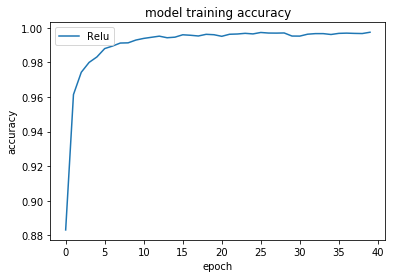

In [11]:
# Data Visualized
plt.plot(MODEL.history["acc"])

plt.title("model training accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["Relu"],loc="best")
plt.show()

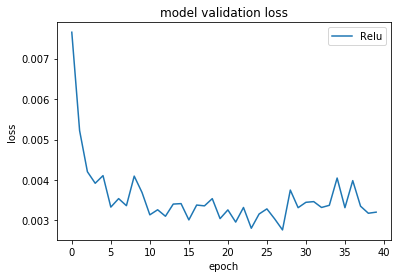

In [12]:
plt.plot(MODEL.history["val_loss"])

plt.title("model validation loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["Relu"],loc="best")
plt.show()